<a href="https://colab.research.google.com/github/crowetc/Random_Projects/blob/master/MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# Package Imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [16]:
# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Scale image values between 0 and 1
train_images = train_images/255.
test_images = test_images/255.

# Add dummy channel dimension
train_images = train_images[...,np.newaxis]
test_images = test_images[...,np.newaxis]


In [17]:
# Define test_accuracy function

def get_test_accuracy(model, test_images, test_labels):
  test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
  print('accuracy: {acc:0.3f}'.format(acc=test_acc))
  print('loss: {loss:0.3f}'.format(loss=test_loss))

In [18]:
# Define get_model_function

def get_model():
  model = Sequential([
    Conv2D(64, (3,3), activation='relu', padding='SAME',
           input_shape=(28,28,1), name='conv_1'),
    MaxPooling2D((2,2), name='pool_1'),
    BatchNormalization(name='batch_1'),
    
    Conv2D(64, (3,3), activation='relu', padding='SAME', name='conv_2'),
    MaxPooling2D((2,2), name='pool_2'),
    BatchNormalization(name='batch_2'),
    
    Conv2D(32, (3,3), activation='relu', padding='SAME', name='conv_3'),
    MaxPooling2D((2,2), name='pool_3'),
    BatchNormalization(name='batch_3'),

    Flatten(name='flat_1'),

    Dense(64, activation='relu', name='dense_1'),
    Dense(64, activation='relu', name='dense_2'),
    Dense(10, activation='softmax', name='dense_3'),
  ])

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  
  return model

In [19]:
# Create instance of model
model = get_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 14, 14, 64)        0         
_________________________________________________________________
batch_1 (BatchNormalization) (None, 14, 14, 64)        256       
_________________________________________________________________
conv_2 (Conv2D)              (None, 14, 14, 64)        36928     
_________________________________________________________________
pool_2 (MaxPooling2D)        (None, 7, 7, 64)          0         
_________________________________________________________________
batch_2 (BatchNormalization) (None, 7, 7, 64)          256       
_________________________________________________________________
conv_3 (Conv2D)              (None, 7, 7, 32)         

In [20]:
# Define Checkpoints

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='min')

# Save Weights
checkpoint_path = 'model_weights/checkpoint'
save_weights = ModelCheckpoint(filepath=checkpoint_path,
                               frequency='epoch',
                               save_weights_only=True,
                               verbose=1)

In [21]:
# Define train_model function
def train_model(model, train_images, train_labels):
  history = model.fit(train_images, train_labels, epochs=10, callbacks=[early_stopping, save_weights], 
                      validation_split=0.15, batch_size=64)
  return history

In [22]:
# Run train_model function
history = train_model(model, train_images, train_labels)

Epoch 1/10
797/797 [==============================] - ETA: 0s - loss: 0.1270 - accuracy: 0.9625
Epoch 00001: saving model to model_weights/checkpoint
797/797 [==============================] - 119s 150ms/step - loss: 0.1270 - accuracy: 0.9625 - val_loss: 0.0547 - val_accuracy: 0.9850
Epoch 2/10
797/797 [==============================] - ETA: 0s - loss: 0.0396 - accuracy: 0.9874
Epoch 00002: saving model to model_weights/checkpoint
797/797 [==============================] - 121s 151ms/step - loss: 0.0396 - accuracy: 0.9874 - val_loss: 0.0491 - val_accuracy: 0.9853
Epoch 3/10
797/797 [==============================] - ETA: 0s - loss: 0.0286 - accuracy: 0.9907
Epoch 00003: saving model to model_weights/checkpoint
797/797 [==============================] - 120s 150ms/step - loss: 0.0286 - accuracy: 0.9907 - val_loss: 0.0476 - val_accuracy: 0.9857
Epoch 4/10
797/797 [==============================] - ETA: 0s - loss: 0.0218 - accuracy: 0.9929
Epoch 00004: saving model to model_weights/checkp

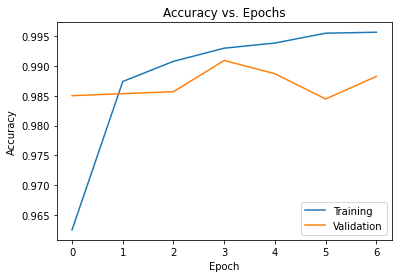

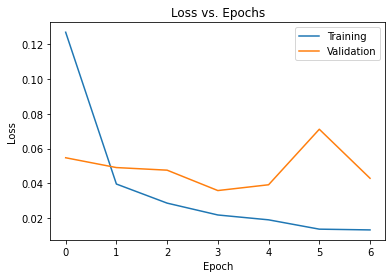

In [23]:
# Plot learning curves

# Accuracy vs Epochs
try:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
except KeyError:
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
plt.title('Accuracy vs. Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

# Loss vs Epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

In [24]:
# Evaluate Model
get_test_accuracy(model, test_images, test_labels)

accuracy: 0.991
loss: 0.035


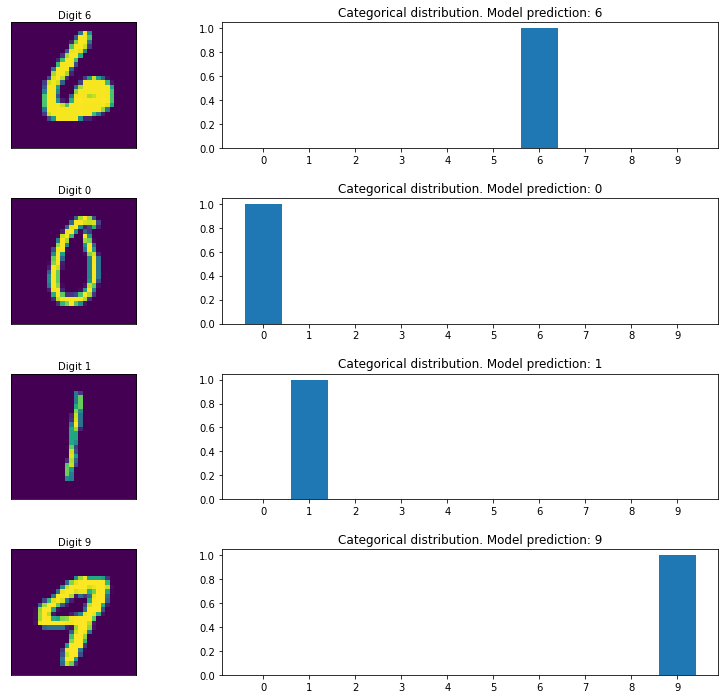

In [37]:
# Get model predictions
num_test_images = test_images.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_test_images = test_images[random_inx, ...]
random_test_labels = test_labels[random_inx, ...]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()